# Ejercicio Machine Learning: Gaussian naive bayes

## Diego Alexis Mier  No. 16111728

### Comprar o rentar una casa? cual convendra? 

En este ejercicio, usamos el algoritmo Gaussian naive Bayes para determinar si conviene adquirir un credito hipotecario para comprar una casa o conviene rentar una casa

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sb

%matplotlib inline
plt.rcParams['figure.figsize'] = (16,9)
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest

In [2]:
dataframe = pd.read_csv('comprar_alquilar.csv')
dataframe.head(10)

,ingresos,gastos_fijos,pago_auto,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
0,6000,1000,0,600,50000,400000,0,2,2,1
1,6745,944,123,429,43240,636897,1,3,6,0
2,6455,1033,98,795,57463,321779,2,1,8,1
3,7098,1278,15,254,54506,660933,0,0,3,0
4,6167,863,223,520,41512,348932,0,0,3,1
5,5692,911,11,325,50875,360863,1,4,5,1
6,6830,1298,345,309,46761,429812,1,1,5,1
7,6470,1035,39,782,57439,606291,0,0,1,0
8,6251,1250,209,571,50503,291010,0,0,3,1
9,6987,1258,252,245,40611,324098,2,1,7,1


REFERENCIAS:
ingresos y gastos mensuales de quienes pagarian el prestamo hipotecario
trabajo: 0-sin trabajo 1-autonomo 2-asalariado 3-empresario 4-Autonomos 5-Asalariados 6-Autonomo y Asalariado 7-Empresario y Autonomo 8 Empresarios o empresario y autónomo
estado_civil: 0-soltero 1-casado 2-indefinido
hijos: Cantidad de dependientes
comprar: 0-mejor alquilar 1-Comprar casa
hipoteca fija a 30 años con interes

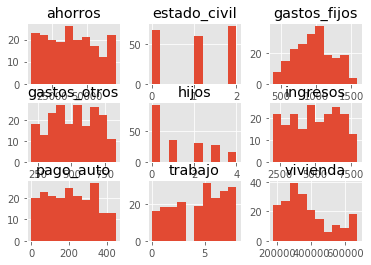

In [3]:
dataframe.drop(['comprar'], axis=1).hist()
plt.show()

### Preprocesado de los datos 

Se anexan 2 atributos nuevos, uno de gastos el cual representa los gastos mensuales y el otro de financiar el cual representa el monto posible del credito

In [4]:
dataframe['financiar'] = dataframe['vivienda'] - dataframe['ahorros']
dataframe.drop(['gastos_fijos', 'gastos_otros', 'pago_auto'], axis=1).head(10)

,ingresos,ahorros,vivienda,estado_civil,hijos,trabajo,comprar,financiar
0,6000,50000,400000,0,2,2,1,350000
1,6745,43240,636897,1,3,6,0,593657
2,6455,57463,321779,2,1,8,1,264316
3,7098,54506,660933,0,0,3,0,606427
4,6167,41512,348932,0,0,3,1,307420
5,5692,50875,360863,1,4,5,1,309988
6,6830,46761,429812,1,1,5,1,383051
7,6470,57439,606291,0,0,1,0,548852
8,6251,50503,291010,0,0,3,1,240507
9,6987,40611,324098,2,1,7,1,283487


### Estadistica descriptiva de los datos

In [5]:
reduced = dataframe.drop(['gastos_fijos', 'gastos_otros', 'pago_auto'], axis=1)
reduced.describe()

,ingresos,ahorros,vivienda,estado_civil,hijos,trabajo,comprar,financiar
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,4958.995050,38749.668317,373349.638614,1.024752,1.232673,4.490099,0.331683,334599.970297
std,1682.862556,17365.231870,136371.525622,0.837184,1.367833,2.535794,0.471988,126607.099497
min,2008.000000,10319.000000,176553.000000,0.000000,0.000000,0.000000,0.000000,154716.000000
25%,3513.750000,24964.250000,274810.000000,0.000000,0.000000,2.000000,0.000000,240410.250000
50%,4947.500000,38523.000000,340783.500000,1.000000,1.000000,5.000000,0.000000,301177.000000
75%,6374.500000,52150.750000,444482.000000,2.000000,2.000000,7.000000,1.000000,393413.000000
max,7984.000000,69934.000000,669540.000000,2.000000,4.000000,8.000000,1.000000,618621.000000


### Seleccion de atributos caracteristicos de entrada (Feature Selection)


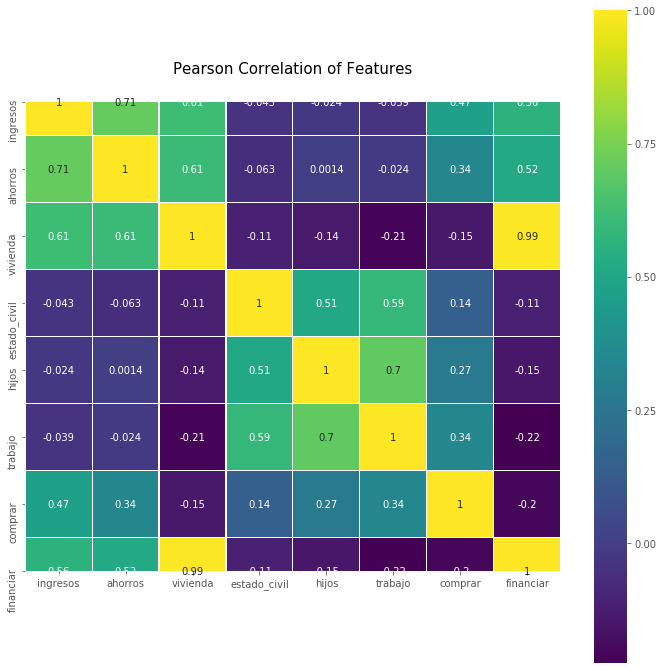

In [6]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sb.heatmap(reduced.astype(float).corr(), linewidth=0.1, vmax=1.0, square=True, cmap = colormap, linecolor='white', annot=True)

Se utiliza la clase SkLearn para seleccionar los 5 mejores caracteristicas

In [10]:
x = dataframe.drop(['comprar'], axis=1)
y = dataframe['comprar']

best = SelectKBest(k=5)
x_new = best.fit_transform(x,y)
x_new.shape
selected = best.get_support(indices=True)
print(x.columns[selected])

Index(['ingresos', 'ahorros', 'hijos', 'trabajo', 'financiar'], dtype='object')


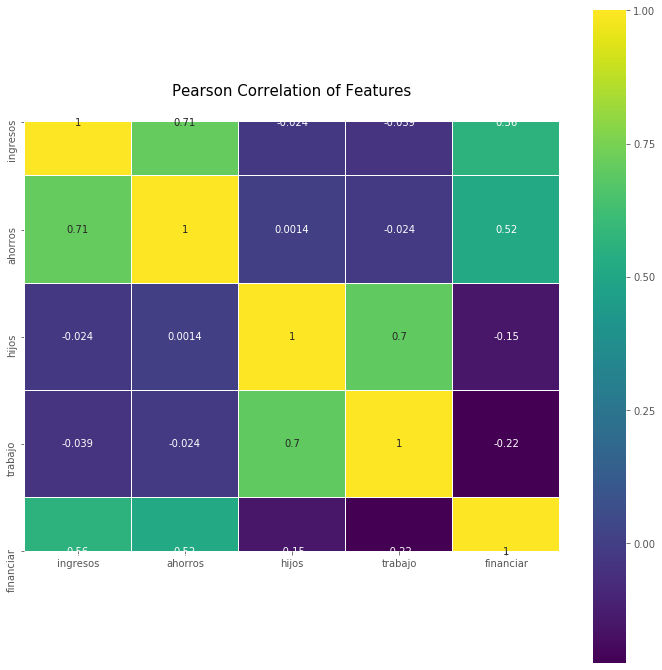

In [11]:
used_features = x.columns[selected]

colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sb.heatmap(dataframe[used_features].astype(float).corr(), linewidth=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

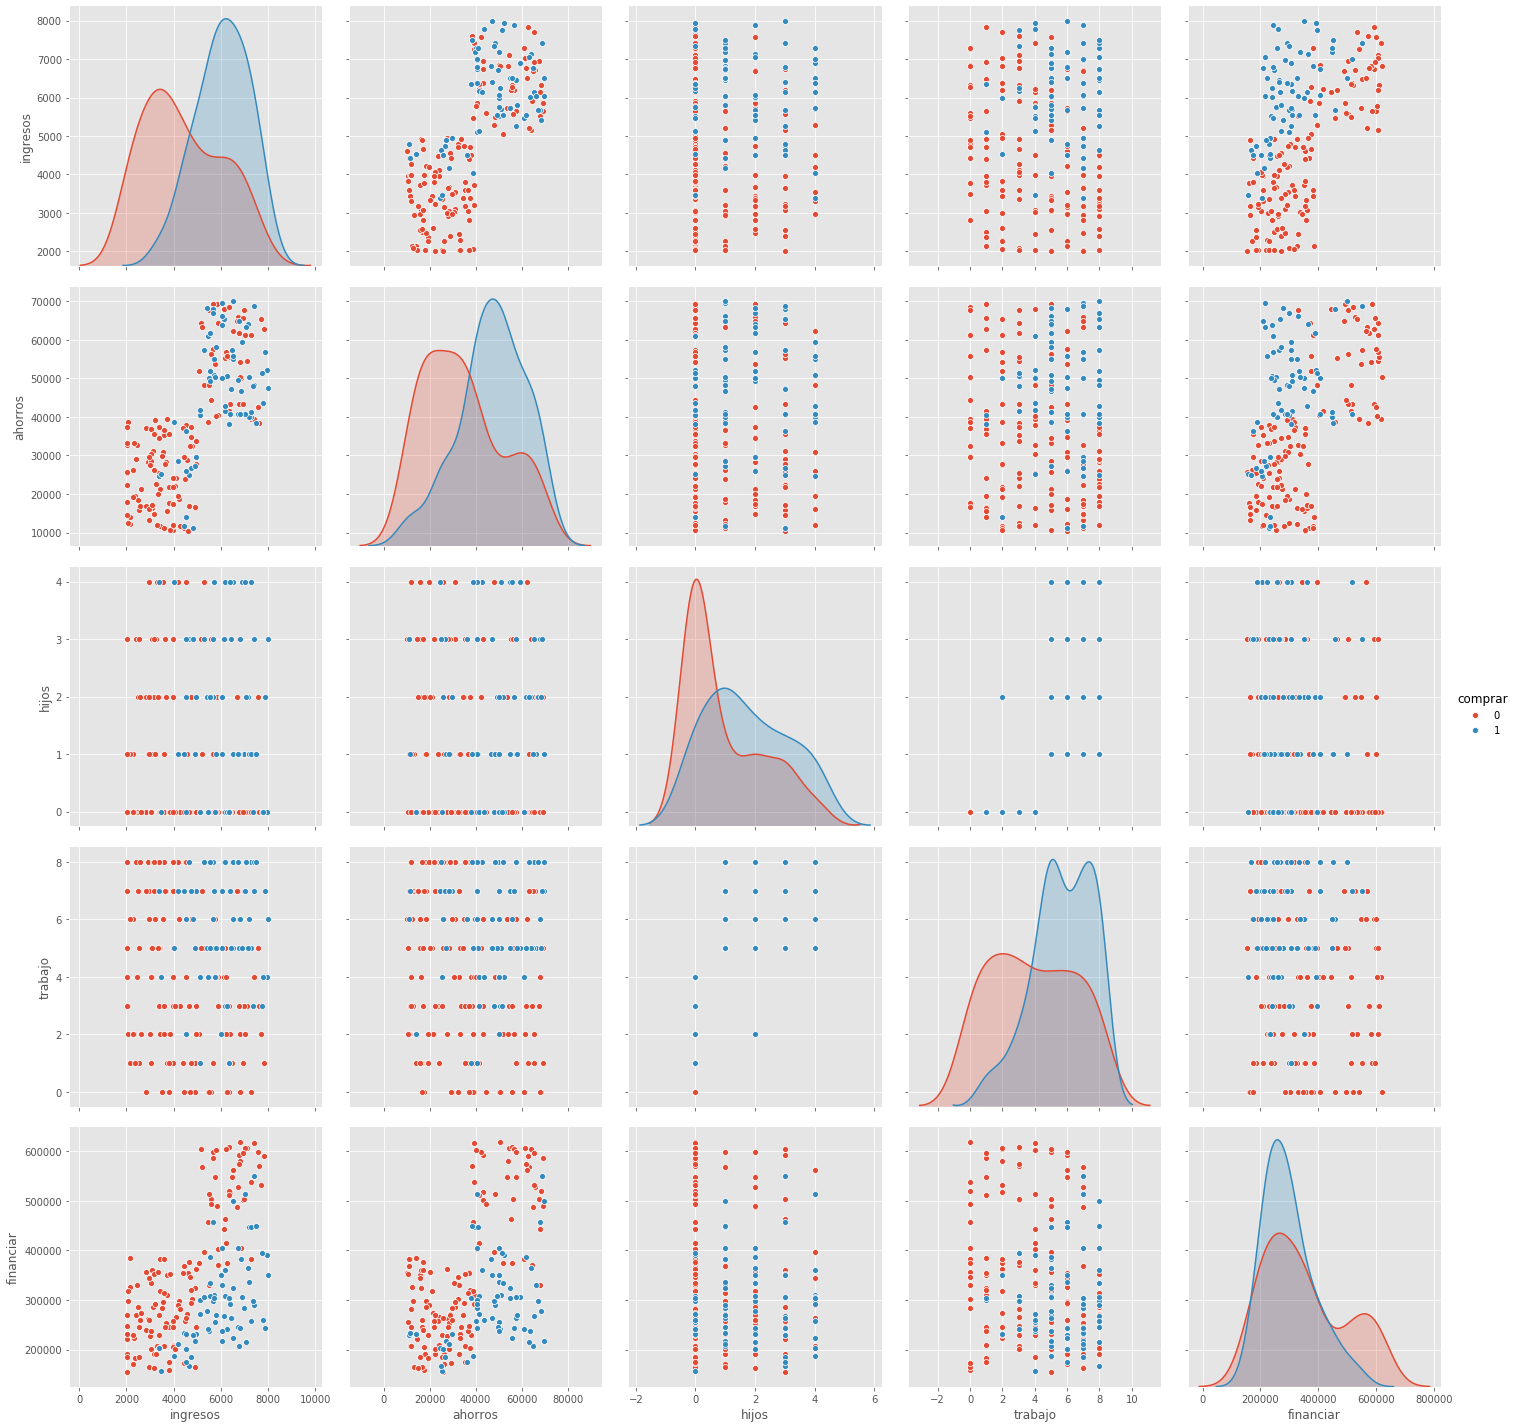

In [12]:
sb.pairplot(dataframe, hue='comprar', height=4, vars=used_features, kind='scatter')

### Ejemplo: Graficar 2 de las caracteristicas 

[(100000, 700000), (2000, 9000)]

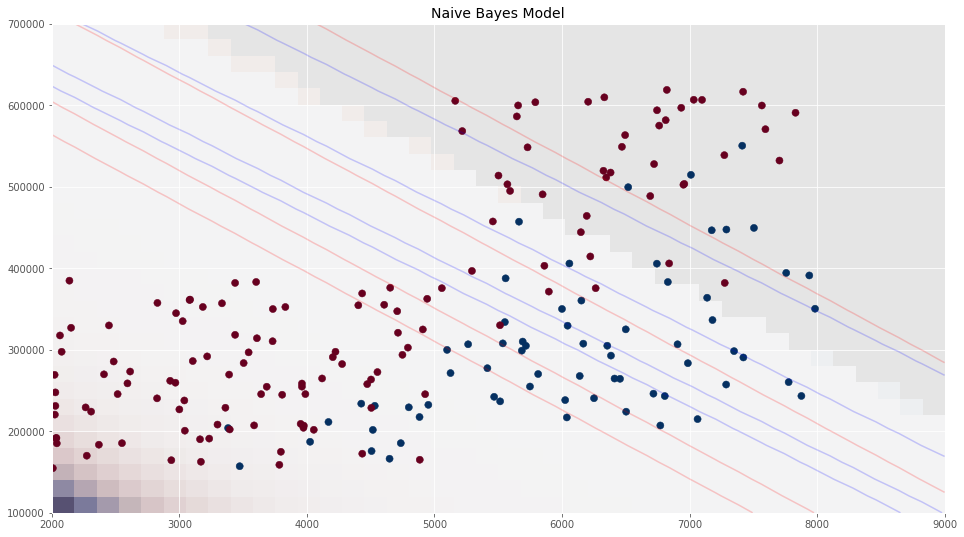

In [24]:
used_features2 =[
    "ingresos",
    "financiar"
]
X=dataframe[used_features2].values
y=dataframe["comprar"]

fig, ax = plt.subplots()

ax.scatter(X[:,0], X[:,1], c=y, s=50, cmap='RdBu')
ax.set_title('Naive Bayes Model', size=14)

xlim = (2000, 9000)
ylim = (100000, 700000)

xg = np.linspace(xlim[0], xlim[1], 40)
yg = np.linspace(ylim[0], ylim[1], 30)
xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

for label, color in enumerate(['red', 'blue']):
    mask = (y == label)
    mu, std = X[mask].mean(0), X[mask].std(0)
    P = np.exp(-0.5 * (Xgrid - mu) * 2 / std * 2).prod(1)
    Pm = np.ma.masked_array(P, P < 0.03)
    ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5,
                  cmap=color.title() + 's')
    ax.contour(xx, yy, P.reshape(xx.shape),
               levels=[0.01, 0.1, 0.5, 0.9],
               colors=color, alpha=0.2)
    
ax.set(xlim=xlim, ylim=ylim)

Se aprecia que una cantidad mayor de ingreso y una cantidad menor de financiamiento es mejor la opcion de comprar casa (en azul). De otra manera convendra rentar (en rojo)

### Obtencion del modelo de Gaussian Naive Bayes 

Se divide un set de entrenamiento y otro de test con 25% de entradas

In [15]:
x_train, x_test = train_test_split(dataframe, test_size=0.25, random_state=6)
y_train=x_train['comprar']
y_test=x_test['comprar']

In [17]:
#Entrenamos al modelo
#iniciamos el clasificador
gnb=GaussianNB()
#entrenar al clasificador
gnb.fit(
    x_train[used_features].values,
    y_train
)
y_pred = gnb.predict(x_test[used_features])

### Resultados

In [18]:
print('Precision del conjunto de entrenamiento: {:.2f}'.format(gnb.score(x_train[used_features], y_train)))
print('Precision del conjunto de prueba: {:.2f}'.format(gnb.score(x_test[used_features], y_test)))

Precision del conjunto de entrenamiento: 0.85
Precision del conjunto de prueba: 0.92


In [20]:
print('Total de muestras probadas: {}\nfallos:{}'.format(
  x_test.shape[0],
    (y_test != y_pred).sum()
))

Total de muestras probadas: 51
fallos:4


In [21]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[31  0]
 [ 4 16]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        31
           1       1.00      0.80      0.89        20

    accuracy                           0.92        51
   macro avg       0.94      0.90      0.91        51
weighted avg       0.93      0.92      0.92        51



### Nuevas predicciones 

Realizamos 2 pruebas en las que el algoritmo recomienda rentar (0) y comprar (1)

In [22]:
# [Ingresos, ahorros, hijos, trabajo, financiar]
print(gnb.predict([[2000,5000,0,5,200000], 
                 [6000, 34000,2,5,320000]]))

[0 1]
